In [1]:
import pandas as pd
import numpy as np
import re

## 1.数据获取

In [16]:
data = pd.read_csv('info.csv')#数据为安居客网站（https://beijing.anjuke.com/）爬取   地区：北京

In [17]:
data

,Unnamed: 0,TITLE,PRICE,ACE_PRICE,ANXUAN,HOUSES,AREA,FLOOR,YEAR,ADDRE,OTHERS
0,0,\n国誉府4室2卫户型方正无遮挡不临街低总价随时看,650.0,40057元/m²,安选,4室2厅,162m²,低层(共19层),2015年建造,\n北京城建国誉府 \n房山-良乡-文昌东路,"['配套成熟', '交通便利', '品质小区']"
1,1,\n怡海花园六期全南两居室采光好户型方正看房方便有钥匙,689.0,54410元/m²,安选,2室2厅,126m²,低层(共27层),2006年建造,\n怡海花园恒丰园 \n丰台-科技园区-康辛路,"['三房朝南', '繁华地段', '品质小区']"
2,2,\n朝阳区示范小区樱花园满五年公房全明户型紧邻地铁业主急售,450.0,79156元/m²,安选,2室1厅,56m²,高层(共6层),1986年建造,\n樱花园小区 \n朝阳-惠新西街-北京市朝阳区建安东路,"['近地铁', '配套成熟', '环境优美']"
3,3,\n国誉府上跃100平米双露台12.9面宽270观景,980.0,38889元/m²,安选,6室3厅,252m²,高层(共8层),2015年建造,\n北京城建国誉府 \n房山-良乡-文昌东路,"['配套成熟', '素质住户', '品质小区']"
4,4,\n房山区良乡2层精装修两居室，南北通透户型方正,255.0,27090元/m²,安选,2室2厅,94m²,低层(共6层),2002年建造,\n体育场路6号院 \n房山-良乡-房山区良乡体育场路6号,"['配套成熟', '交通便利', '繁华地段']"
...,...,...,...,...,...,...,...,...,...,...,...
1174,1174,\n首开国风美仑全南向2居室高楼层视野好首付100万,250.0,32121元/m²,安选,2室2厅,77m²,高层(共15层),2014年建造,\n首开国风美仑 \n通州-马驹桥-兴贸二街5号,[]
1175,1175,\n业主自住豪华独栋别墅，6个卧室四居朝南，车位可停4辆车.,1800.0,78947元/m²,安选,6室4厅,228m²,共3层,2000年建造,\n名都园(别墅) \n顺义-中央别墅区-榆阳路6号,[]
1176,1176,\n西城区温馨小两居南北通透不临街,490.0,86344元/m²,安选,2室1厅,56m²,高层(共6层),1993年建造,\n车站西街15号院 \n西城-广安门外-车站西街,"['近地铁', '主卧朝南', '南北通透']"
1177,1177,\n来康郡中式合院别墅私家电梯独门独院临湖而居中西衣院,470.0,22488元/m²,安选,4室3厅,209m²,共2层,2013年建造,\n牛驼温泉孔雀城(别墅) \n北京周边-廊坊-金海街,"['近地铁', '新房房源', '中国风']"


#### 数据集：北京市部分安居客网站公示房源。数据字段：TITLE：房源名称，PRICE：总价格，ACE_PRICE：单价，ANXUAN：品质，HOUSES：房屋结构，AREA：房屋面积，FLOOR：楼层，YEAR：年代，ADDRE：地址，OTHERS：其他备注。

## 2.数据清洗和处理

#### 1.把数据中文拆分，房屋结构，年代，楼层等变为结构化数据。

In [18]:
data =data.drop(['TITLE','ADDRE'],axis =1)

In [19]:
ROOM = []
HAll = []
for i in data['HOUSES']:
    ROOM.append(i.split('室')[0])
    HAll.append(i.split('室')[1].split('厅')[0])
data['ROOM'] = ROOM
data['HAll'] = HAll

In [20]:
data['ACE_PRICE_NEW'] = [x.split('元')[0] for x in data['ACE_PRICE']]
data['YEAR_NEW'] = [x.split('年')[0] for x in data['YEAR']]
data['YEAR_NEW'] = [x.split('年')[0] for x in data['YEAR']]
data['FLOOR_NEW'] = [x.split('共')[1].split('层')[0] for x in data['FLOOR']]
data['NIAN'] = [2019 - int(x) for x in data['YEAR_NEW']]
data['AREA_NEW'] = [x.split('m²')[0] for x in data['AREA']]

#### 2.将其他备注信息分类变为分类变量，新生成靠近地铁或学校的变量。

In [21]:
data['SUBWAY'] =  [1 if '近地铁' in  x else 0 for x in data['OTHERS']]
data['SCHOOL'] =  [1 if '近学校' in  x else 0 for x in data['OTHERS']]

In [22]:
print(data['OTHERS'])

0       ['配套成熟', '交通便利', '品质小区']
1       ['三房朝南', '繁华地段', '品质小区']
2        ['近地铁', '配套成熟', '环境优美']
3       ['配套成熟', '素质住户', '品质小区']
4       ['配套成熟', '交通便利', '繁华地段']
                  ...           
1174                          []
1175                          []
1176     ['近地铁', '主卧朝南', '南北通透']
1177      ['近地铁', '新房房源', '中国风']
1178    ['新房房源', '配套成熟', '交通便利']
Name: OTHERS, Length: 1179, dtype: object


In [23]:
data = data.drop(['ACE_PRICE','ANXUAN','HOUSES','AREA','FLOOR','YEAR','OTHERS','YEAR_NEW'],axis =1)

#### 3.源数据没有缺失值，不用作缺失值处理

#### 4.源数据整理清洗后，新生成用于统计的数据，new_data。

In [24]:
data

,Unnamed: 0,PRICE,ROOM,HAll,ACE_PRICE_NEW,FLOOR_NEW,NIAN,AREA_NEW,SUBWAY,SCHOOL
0,0,650.0,4,2,40057,19,4,162,0,0
1,1,689.0,2,2,54410,27,13,126,0,0
2,2,450.0,2,1,79156,6,33,56,1,0
3,3,980.0,6,3,38889,8,4,252,0,0
4,4,255.0,2,2,27090,6,17,94,0,0
...,...,...,...,...,...,...,...,...,...,...
1174,1174,250.0,2,2,32121,15,5,77,0,0
1175,1175,1800.0,6,4,78947,3,19,228,0,0
1176,1176,490.0,2,1,86344,6,26,56,1,0
1177,1177,470.0,4,3,22488,2,6,209,1,0


#### 新的数据集各字段意义表示为：

PRICE：总房价
ROOM：卧室数量
Hall：客厅数量
ACE_PRICE_NEW：平均单价
FLOOR_NEW：楼层
NIAN：使用时间（现在时间-建造时间）
AREA_NEW：使用面积
SUBWAY：是否有地铁
SCHOOL：是否学区

In [25]:
data.to_csv('new_data.csv')

## 3.描述性分析

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [29]:
matplotlib.rcParams['font.sans-serif'] = ['SimHei'] 
data = pd.read_csv('new_data.csv')

#### 探究房源的平均单价与总标的价目之间的关系，采用散点图作图，横坐标房屋总价，纵坐标平均单价。散点图如下所示：

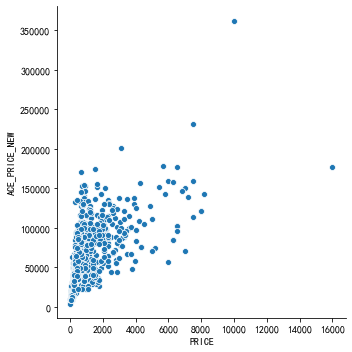

In [30]:
sns.relplot(x='PRICE', y='ACE_PRICE_NEW', data=data)

房屋总价与平均单价大致呈正比关系，大部分房屋总价在2000万以内，平均单价大约集中在10000/m左右。

#### 探究房屋总价与房间结构（卧室）数量分布的关系，采用条形图列示，横坐标表示房间的卧室数量，纵坐标表示房屋总价格。其二者关系如图所示：

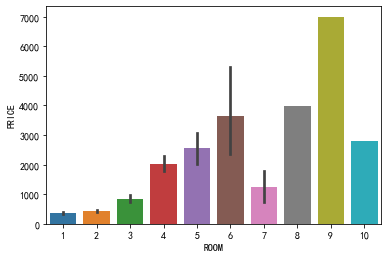

In [34]:
sns.barplot(x="ROOM", y="PRICE", data=data)

大多是房间的卧室数量在6以内，其价格随卧室数量增多房屋总价增高。

## 4.模型分析

#### 根据new_data数据建立线性回归模型，其中总房价为因变量，其他变量如房屋卧室数量，是否学区房，是否近地铁等等因素为自变量。建立拟合的线性模型。

In [35]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [48]:
df = data.iloc[:,1:]

In [49]:
print(df)

      Unnamed: 0.1   PRICE  ROOM  HAll  ACE_PRICE_NEW  FLOOR_NEW  NIAN  \
0                0   650.0     4     2          40057         19     4   
1                1   689.0     2     2          54410         27    13   
2                2   450.0     2     1          79156          6    33   
3                3   980.0     6     3          38889          8     4   
4                4   255.0     2     2          27090          6    17   
...            ...     ...   ...   ...            ...        ...   ...   
1174          1174   250.0     2     2          32121         15     5   
1175          1175  1800.0     6     4          78947          3    19   
1176          1176   490.0     2     1          86344          6    26   
1177          1177   470.0     4     3          22488          2     6   
1178          1178    72.0     2     2           8471         25     0   

      AREA_NEW  SUBWAY  SCHOOL  
0          162       0       0  
1          126       0       0  
2           

#### 聚类

In [50]:
kms = KMeans(n_clusters=3)
lable = kms.fit_predict(df)
print(lable) #输出的是每一行聚类的归属

[1 0 0 ... 0 1 1]


#### 回归分析

In [40]:
x = df.iloc[:,2:]#自变量
y = df.iloc[:,1]#因变量

In [41]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)#切分数据训练集和测试集
lr_model = LinearRegression()#建立回归模型
lr_model.fit(X_train,y_train)#训练模型
pre = lr_model.predict(X_test)#预测模型

In [42]:
print('Coefficients:',lr_model.coef_)#每个x的系数

Coefficients: [-8.82842922e+01 -7.88598530e+01  1.72627242e-02 -2.34914114e+00
 -4.53140556e+00  8.16294614e+00 -9.93291030e+01  4.28328380e+01]


In [43]:
print('Intercept:',lr_model.intercept_)#截距

Intercept: -737.0515135572784


In [44]:
print('Mean squared error : %.2f' % mean_squared_error(y_test,pre))#均方误差

Mean squared error : 182384.06


In [45]:
print('Variance score : %.2f' % r2_score(y_test,pre))#r2值

Variance score : 0.85


模型的整体均方误差为182384.
整体的R2 为0.85
达到了较好的拟合效果。